
# Regression Example
The example below uses a [marketing](https://scikit-learn.org/stable/datasets/toy_dataset.html) dataset,
in order to illustrate a regression activity.

## Workflow
1. Preparation
    1. Load the dataset from a `.csv` file and show a short description
    1. Data preparation, according to background information
    1. Set the __target__ variable, according to background information
    1. Show the two dimensional scatter plots for all the predicting variables with respect to the target
    1. Split the data into *predicting variables* `X` and *target* `y`
        1. here we set the `random_state` variable to make the experiment *repeatable* 
1. First experiment: compute the regression on a single predicting variable
    1. Consider a reduced dataset containing the chosen variable and the target
    1. Fit the `LinearRegression` estimator on the training set
    1. Show the statistical significance of the fitted model
    1. Predict the target for the test set using the *fitted* estimator
    1. Compute the regression coefficients and the quality measures: *Root Mean Squared Error (RMSE)* and *coefficient of determination (r2)*
1. Second experiment: compute the regression considering all the predicting variables
    1. Repeat the steps from 2.2 to 2.5
1. Third experiment: use the `DecisionTreeRegressor` with the entire dataset
    1. Fit the tree using the default hyperparameters, in order to find the 
    maximum depth of the unconstrained tree
    1. Use *cross-validation* to find the optimal *maximum depth* of the tree
    1. Fit the tree with the optmal `max_depth`
    1. Predict and show the *root mean squared error*
1. Fourth experiment: use the `RandomForestRegressor`
    1. Repeat steps from 4.2 to 4.4 (for simplicity, we use the maximum `max_depth` found in 4.1)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import root_mean_squared_error, r2_score
import pandas as pd
random_state = 94922767

## Load the dataset from a `.csv` file and show a short description

In [2]:
url = "regression_example.csv"
df = pd.read_csv(url)

df.head()

,idx,F0,F1,F2,F3,F4,F5,F6,F7,response
0,0,1.509081,-1.049118,1.978885,1.060733,NaN,0.824655,0.819409,-1.157708,214.593802
1,1,0.644764,0.007172,0.004493,4.168748,-0.622817,1.855366,-0.540468,1.141118,151.951717
2,2,0.890241,1.080162,0.168031,0.002733,0.522478,0.407804,1.629592,-1.102599,117.280863
3,3,-0.212410,-1.034267,1.843441,4.486992,-0.610050,0.734101,-0.142660,-0.172119,229.358473
4,4,-0.827402,-2.048496,-0.066242,1.361695,1.268456,-1.084906,1.986556,0.425511,230.153189


## Data Exploration and preparation

##### Show a short description of the columns

In [3]:
df.describe()

,idx,F0,F1,F2,F3,F4,F5,F6,F7,response
count,843.000000,802.000000,807.000000,812.000000,8.020000e+02,805.000000,808.000000,806.000000,812.000000,813.000000
mean,421.000000,-0.037473,0.008466,-0.059965,9.616777e-01,-0.093113,0.034653,-0.019928,-0.034976,3.798356
std,243.497433,1.038115,0.973884,0.991280,1.286476e+00,1.050385,0.957238,0.997345,0.963010,114.189124
min,0.000000,-3.700229,-2.832440,-4.141473,2.007427e-08,-4.072767,-2.968219,-2.850505,-3.948627,-358.659591
25%,210.500000,-0.723630,-0.640017,-0.681924,8.725649e-02,-0.802553,-0.625219,-0.689671,-0.662887,-73.823652
50%,421.000000,-0.032953,0.005693,-0.050789,4.707895e-01,-0.090512,0.051123,-0.014592,-0.049392,-0.159154
75%,631.500000,0.629368,0.681480,0.587393,1.350123e+00,0.611545,0.689203,0.612939,0.614423,75.487094
max,842.000000,3.043062,2.945731,2.925432,9.200073e+00,3.024952,3.210373,2.861549,3.000174,422.794685


##### Show the number of rows with nulls

It is computed subtracting the number of rows in the dataset without nulls from the original number of rows

In [4]:
df.isnull().any(axis=1).sum()

np.int64(273)

#### Drop data that are useless or not usable

In [5]:
df = df.drop("idx", axis=1).dropna()
print(f"Shape of the final dataset {df.shape[0]} rows and {df.shape[1]} columns")

Shape of the final dataset 570 rows and 9 columns


In [6]:
df.head()

,F0,F1,F2,F3,F4,F5,F6,F7,response
1,0.644764,0.007172,0.004493,4.168748,-0.622817,1.855366,-0.540468,1.141118,151.951717
2,0.890241,1.080162,0.168031,0.002733,0.522478,0.407804,1.629592,-1.102599,117.280863
3,-0.212410,-1.034267,1.843441,4.486992,-0.610050,0.734101,-0.142660,-0.172119,229.358473
4,-0.827402,-2.048496,-0.066242,1.361695,1.268456,-1.084906,1.986556,0.425511,230.153189
5,-0.635465,-1.112850,-0.330580,6.141348,1.914527,0.408895,-0.364722,-0.731382,-261.116572


## Choose the target and split the data into *predicting variables* `X` and *target* `y`

In [7]:
target = "response"

X = df.drop(target, axis=1)
y = df[target]

## Show the two dimensional scatter plots for all the predicting variables with respect to the target

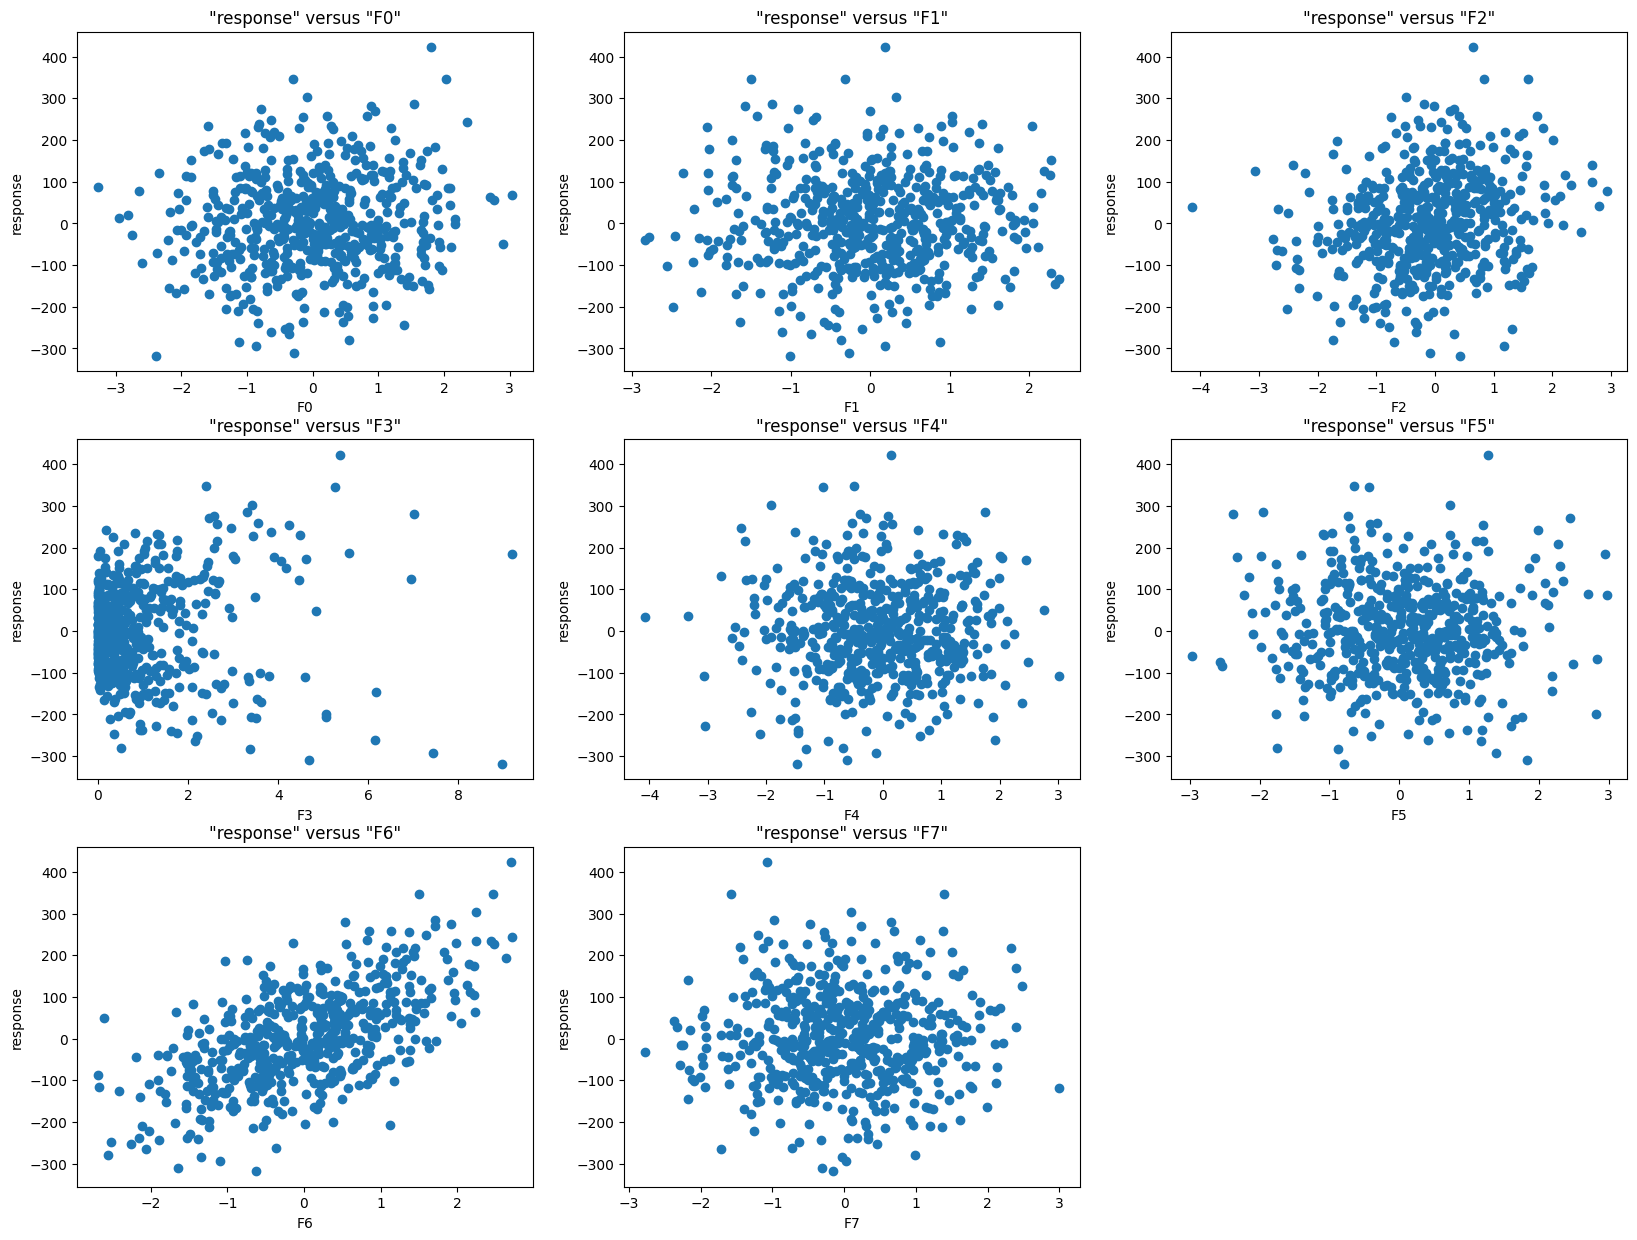

In [8]:
plt.figure(figsize=(20,15))

for i, var in enumerate(X.columns):
    plt.subplot(3, 3, i+1)
    plt.scatter(X[var], y)
    plt.title(f'"{target}" versus "{var}"')
    plt.xlabel(var)
    plt.ylabel(target)

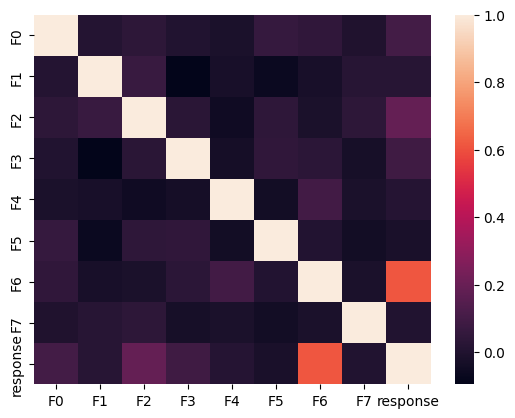

In [9]:
import seaborn as sns

sns.heatmap(df.corr())
plt.show()

## Split the data into *train* and *test* and show the sizes of the two parts
Here we set the `random_state` variable to make the experiment *repeatable*


In [10]:
from sklearn.model_selection import train_test_split
ts = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=random_state)

print(f"Training set and test set have {X_train.shape[0]} and {X_test.shape[0]} elements respectively")

Training set and test set have 399 and 171 elements respectively


In [11]:
# sorting test set for visualization
X_test_sorted_indexes = X_test.sort_values(by="F6").index
X_test = X_test.loc[X_test_sorted_indexes]
y_test = y_test.loc[X_test_sorted_indexes]


## 2. First experiment - univariate linear regression
We choose the variable exhibiting the highest correlation with respect to the target

Consider a reduced dataset containing the chosen variable and the target

In [12]:
X_test_red, X_train_red = X_test[["F6"]], X_train[["F6"]]

### Fit the `linear_model` estimator on the training set and predict the target for the test set using the *fitted* estimator

In [13]:
reg_uni = linear_model.LinearRegression().fit(X_train_red, y_train)
y_pred_uni = reg_uni.predict(X_test_red)

#### Compute the quality measures

In [14]:
results = pd.DataFrame(columns=['Model', "RMSE", "R_square"])

In [15]:
coeff_uni = reg_uni.coef_[0]
print(coeff_uni)

rmse_uni = root_mean_squared_error(y_test, y_pred_uni)
r2_uni = r2_score(y_test, y_pred_uni)

results.loc[len(results)] = ["linear univariate on f6", rmse_uni, r2_uni]

73.96616764309124


## Second experiment: compute the regression considering all the predicting variables

### Now we use the entire data in `X_train` and `X_test` for fitting and predicting

In [16]:
reg_multi = linear_model.LinearRegression().fit(X_train, y_train)
y_pred_multi = reg_multi.predict(X_test)

### Fit, predict and show the results
Now we see the *regression coefficients* resulting from the fitting. 

In particular, *positive coefficients* indicate that the target *increases* with the variable, *negative coefficients* indicate a *decreasing* trend.

The absolute values of the coefficient cannot be considered directly a measure of importance, due to the possibly different orders of magnitude of the data in the different columns (observe above the outputs of `describe`).

In [17]:
pd.DataFrame({"Variable":X.columns, "Coefficient":reg_multi.coef_})

,Variable,Coefficient
0,F0,9.225329
1,F1,2.794846
2,F2,21.766171
3,F3,3.299594
4,F4,-5.532386
5,F5,-6.002884
6,F6,72.949625
7,F7,-2.675824


#### Compute the quality measures

In [18]:
rmse_multi = root_mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

results.loc[len(results)] = ["Linear multivariate", rmse_multi, r2_multi]

## Decision Tree Multivariate Regresson

In [19]:
# Create Decision Tree regression object
from sklearn.tree import DecisionTreeRegressor

#### Fit the tree with default hyperparameters, and find the maximum depth of the unconstrained tree

In [20]:
ct_reg_unconstrained = DecisionTreeRegressor().fit(X_train, y_train)
print(f"The maximum depth of the full Decision Tree Regressor is {ct_reg_unconstrained.get_depth()}")

The maximum depth of the full Decision Tree Regressor is 22


#### Find the optimal value of the hyperparameter `max_depth` with *cross-validation*
The optimization searches for the *maximum tree depth* guaranteing the smallest mean squared error
At the end, this operation returns also the *fitted best tree* `best_estimator_`

In [21]:
from sklearn.model_selection import GridSearchCV

parameters = {"max_depth": [*range(1, ct_reg_unconstrained.get_depth()+1)]}

clf = GridSearchCV(ct_reg_unconstrained, param_grid=parameters)
clf.fit(X_train, y_train)
best_estimator = clf.best_estimator_
print(f"The optimal depth is {best_estimator.get_depth()}")

The optimal depth is 2


In [22]:
y_pred_dt = best_estimator.predict(X_test)

rmse_dt = root_mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

results.loc[len(results)] = ["Decision tree multivariate", rmse_dt, r2_dt]
print(f"Decision Tree Regression - RMSE = {rmse_dt:.2f}")

Decision Tree Regression - RMSE = 89.83


#### Show the tree

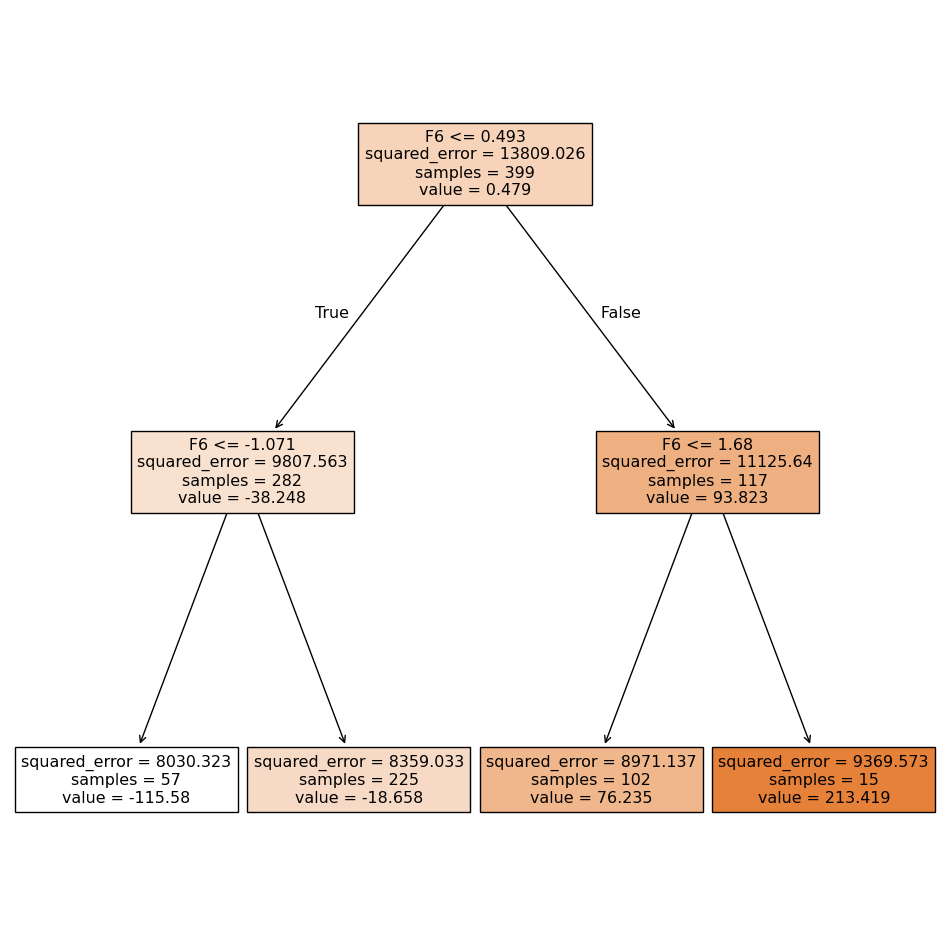

In [23]:
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure

plt.figure(figsize=(12,12))
plot_tree(best_estimator, feature_names=X.columns, filled=True)
plt.show()

## Random Forest Multivariate Regresson

In [24]:
# Create Random Forest regression object
from sklearn.ensemble import RandomForestRegressor


In [25]:
clf = GridSearchCV(RandomForestRegressor(random_state=random_state), param_grid=parameters)
clf.fit(X_train, y_train)

best_estimator = clf.best_estimator_

print(f"The optimal maximum depth for the trees in the random forest is {clf.best_params_['max_depth']}")

The optimal maximum depth for the trees in the random forest is 3


In [26]:
y_pred_random_forest_multi = best_estimator.predict(X_test)

rmse_random_forest = root_mean_squared_error(y_test, y_pred_random_forest_multi)
r2_random_forest = r2_score(y_test, y_pred_random_forest_multi)

results.loc[len(results)] = ["Random forest multivariate", rmse_random_forest, r2_random_forest]

### Plot the prediction of every model, using as x axis the predicting variable used in the first experiment, compare the predction with the real test set, and print the metrics $R^2$ and RMSE 

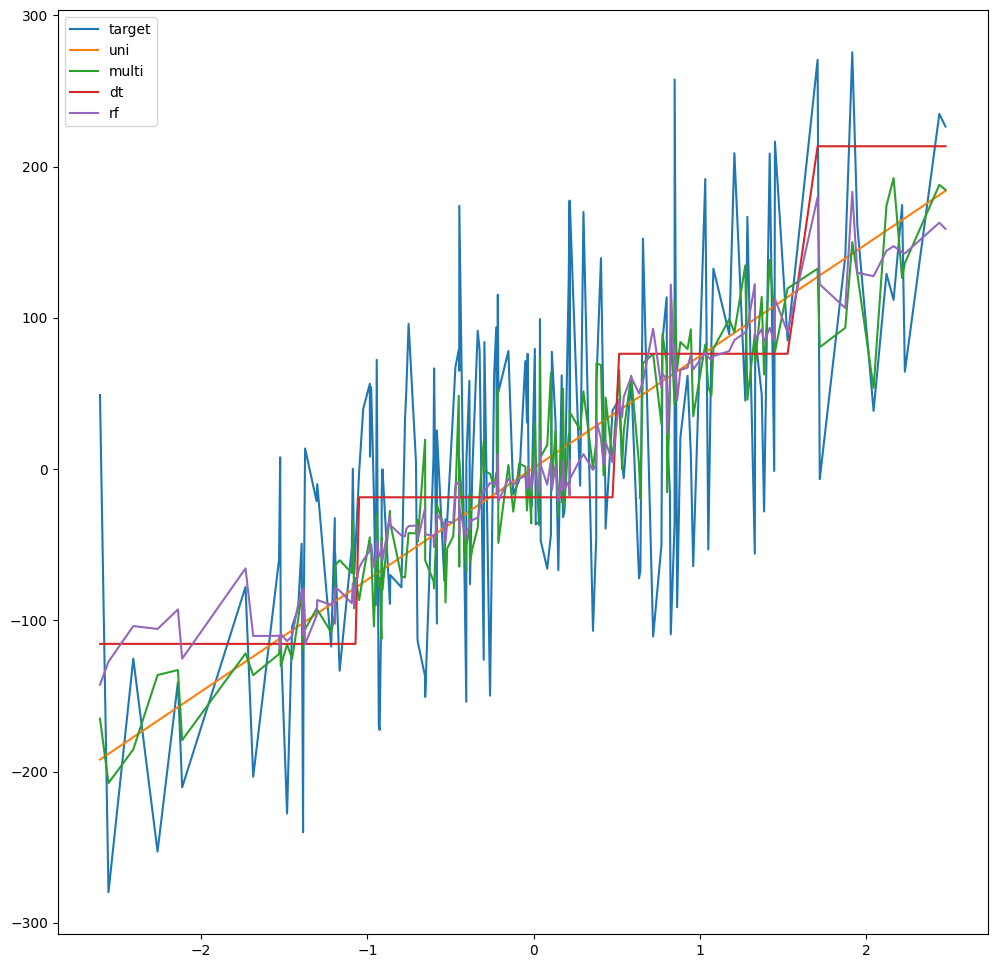

In [27]:
plt.figure(figsize=(12,12))
plt.plot(X_test_red, y_test, label="target")
plt.plot(X_test_red, y_pred_uni, label="uni")
plt.plot(X_test_red, y_pred_multi, label="multi")
plt.plot(X_test_red, y_pred_dt, label="dt")
plt.plot(X_test_red, y_pred_random_forest_multi, label="rf")
plt.legend()
plt.show()

In [28]:
results.head()

,Model,RMSE,R_square
0,linear univariate on f6,85.121744,0.338477
1,Linear multivariate,81.104168,0.399448
2,Decision tree multivariate,89.827208,0.263318
3,Random forest multivariate,84.703295,0.344965


## Final observations
### Linear regression
The multivariate regression with all the predicting variables available with respect to the univariate regression has 
- lower RMSE 
- higher coefficient of determination 

### Decision Tree and Random Forest regression
- Decision Tree and Random Forest have an RMSE slightly higher than multivariate linear regression



## Control questions
1. observing the multi-variate experiment, what variable has the higher effect on the target?
1. is there a variable having an almost negligible effect on the target?
1. try to repeat the univariate experiment with other columns and comment the results